In [269]:
from couplevae import *
import scanpy as sc
# 环境配置与包导入
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
# mpl.use('Agg')  # 如果你在 Notebook 中想显示图，可以注释掉这一行
from scipy.sparse import issparse
from scipy import sparse
from adjustText import adjust_text

from couplevae import *  # 确保你已经正确安装了 couplevae

In [270]:
adata = sc.read("Norman_gene.h5ad")
adata.var_names_make_unique()

d:\anaconda\envs\couplevae_env\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [271]:
adata

AnnData object with n_obs × n_vars = 63378 × 5000
    obs: 'ncounts', 'well', 'plate', 'cell_line', 'replicate', 'time', 'dose_value', 'pathway1', 'pathway2', 'perturbation', 'target', 'pathway', 'dose_unit', 'celltype', 'disease', 'tissue_type', 'organism', 'perturbation_type', 'ngenes', 'percent_mito', 'percent_ribo', 'nperts', 'chembl-ID', 'condition', 'condition_ID', 'control', 'cell_type', 'smiles_rdkit', 'source', 'sample', 'Size_Factor', 'n.umi', 'RT_well', 'Drug1', 'Drug2', 'Well', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'split', 'condition_old', 'pert_type', 'batch', 'split_1ct_MEC', 'split_2ct_MEC', 'split_3ct_MEC', 'batch_cov', 'batch_cov_cond', 'log_dose', 'cov_drug_dose'
    var: 'ensembl_id-0', 'ncounts-0', 'ncells-0', 'symbol-0', 'symbol-1', 'id-1', 'n_cells-1', 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_nor

In [272]:
adata.obs["cell_type"]

A01_A02_RT_BC_10_Lig_BC_18-1    A549
A01_A02_RT_BC_10_Lig_BC_25-1    A549
A01_A02_RT_BC_10_Lig_BC_48-1    A549
A01_A02_RT_BC_10_Lig_BC_51-1    A549
A01_A02_RT_BC_10_Lig_BC_70-1    A549
                                ... 
H12_A02_RT_BC_96_Lig_BC_50-1    A549
H12_A02_RT_BC_96_Lig_BC_95-1    A549
H12_A02_RT_BC_9_Lig_BC_41-1     A549
H12_A02_RT_BC_9_Lig_BC_69-1     A549
H12_A02_RT_BC_9_Lig_BC_83-1     A549
Name: cell_type, Length: 63378, dtype: category
Categories (1, object): ['A549']

In [273]:
adata.obs["condition"] = adata.obs["condition"].astype("category")
adata.obs["condition"].value_counts()

Dacinostat (LAQ824)+PCI-34051                       3298
SRT3025+Cediranib (AZD2171)                         3016
Givinostat (ITF2357)+Cediranib (AZD2171)            2783
SRT2104 (GSK2245840)                                2756
Givinostat (ITF2357)+Curcumin                       2736
Givinostat (ITF2357)+Sorafenib Tosylate             2734
Givinostat (ITF2357)+Carmofur                       2692
Givinostat (ITF2357)+Crizotinib (PF-02341066)       2662
Givinostat (ITF2357)+Dasatinib                      2421
Givinostat (ITF2357)+SRT2104 (GSK2245840)           2353
Dasatinib                                           2343
Givinostat (ITF2357)+SRT1720                        2260
Panobinostat (LBH589)+Curcumin                      2244
Cediranib (AZD2171)+PCI-34051                       2161
Panobinostat (LBH589)+Sorafenib Tosylate            2013
Panobinostat (LBH589)+SRT2104 (GSK2245840)          1971
Panobinostat (LBH589)+Dasatinib                     1955
Dacinostat (LAQ824)+Danusertib 

In [274]:
len(adata.var_names)

5000

In [275]:
# import time
# import pandas as pd
# from biomart import BiomartServer

# # 连接 BioMart
# server = BiomartServer("http://www.ensembl.org/biomart")
# dataset = server.datasets['hsapiens_gene_ensembl']

# # 读取基因 ID
# gene_df = pd.read_csv("gene_names.csv")
# ensembl_ids = gene_df['gene_id'].tolist()

# # 分批处理函数
# def batch_query(dataset, gene_list, batch_size=200):
#     all_results = []
#     for i in range(0, len(gene_list), batch_size):
#         batch = gene_list[i:i + batch_size]
#         try:
#             response = dataset.search({
#                 'filters': {
#                     'ensembl_gene_id': batch
#                 },
#                 'attributes': [
#                     'ensembl_gene_id', 'hgnc_symbol'
#                 ]
#             })
#             results = response.raw.data.decode('utf-8').strip().split('\n')
#             converted = [line.split('\t') for line in results if line.strip()]
#             all_results.extend(converted)
#         except Exception as e:
#             print(f"第{i // batch_size + 1}批次查询失败：{e}")
#         time.sleep(0.5)  # 小延迟防止请求过于频繁
#     return all_results

# # 执行分批查询
# converted = batch_query(dataset, ensembl_ids)

# # 组装 DataFrame
# converted_df = pd.DataFrame(converted, columns=['gene_id', 'gene_symbol'])
# merged_df = gene_df.merge(converted_df, on='gene_id', how='left')

# # 展示结果
# # import ace_tools as tools; tools.display_dataframe_to_user(name="基因ID转换结果", dataframe=merged_df)

In [276]:
# # 假设 adata.var_names 中存的是 Ensembl ID，和 merged_df['gene_id'] 匹配
# # 创建映射字典
# id_to_symbol = dict(zip(merged_df['gene_id'], merged_df['gene_symbol']))

# # 替换 adata.var_names
# adata.var_names = adata.var_names.map(id_to_symbol)


In [277]:
adata.var_names

Index(['TENM1', 'TTN', 'TRHDE', 'PPP1R3A', 'NDST4', 'CLCN4', 'NR1H4', 'CT55',
       'SGCZ', 'ACSBG1',
       ...
       'MPND', 'KLHL35', 'nan-13', 'MTND2P28', 'RNY3P11', 'IMPG1', 'GNAO1',
       'LRRC4C', 'SYK', 'ENC1'],
      dtype='object', length=5000)

In [278]:
adata

AnnData object with n_obs × n_vars = 63378 × 5000
    obs: 'ncounts', 'well', 'plate', 'cell_line', 'replicate', 'time', 'dose_value', 'pathway1', 'pathway2', 'perturbation', 'target', 'pathway', 'dose_unit', 'celltype', 'disease', 'tissue_type', 'organism', 'perturbation_type', 'ngenes', 'percent_mito', 'percent_ribo', 'nperts', 'chembl-ID', 'condition', 'condition_ID', 'control', 'cell_type', 'smiles_rdkit', 'source', 'sample', 'Size_Factor', 'n.umi', 'RT_well', 'Drug1', 'Drug2', 'Well', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'split', 'condition_old', 'pert_type', 'batch', 'split_1ct_MEC', 'split_2ct_MEC', 'split_3ct_MEC', 'batch_cov', 'batch_cov_cond', 'log_dose', 'cov_drug_dose'
    var: 'ensembl_id-0', 'ncounts-0', 'ncells-0', 'symbol-0', 'symbol-1', 'id-1', 'n_cells-1', 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_nor

In [279]:
# 如果还没导入 AnnData 相关库
import anndata as ad

# 如果你想把 'ood' 重命名为 'test'
adata.obs["split_1ct_MEC"] = adata.obs["split_1ct_MEC"].cat.rename_categories({
    "train": "train",
    "valid": "valid",
    "ood": "test"
})

# 分割数据
train = adata[adata.obs["split_1ct_MEC"] == "train"].copy()
valid = adata[adata.obs["split_1ct_MEC"] == "valid"].copy()
test  = adata[adata.obs["split_1ct_MEC"] == "test"].copy()


In [280]:
test

AnnData object with n_obs × n_vars = 8209 × 5000
    obs: 'ncounts', 'well', 'plate', 'cell_line', 'replicate', 'time', 'dose_value', 'pathway1', 'pathway2', 'perturbation', 'target', 'pathway', 'dose_unit', 'celltype', 'disease', 'tissue_type', 'organism', 'perturbation_type', 'ngenes', 'percent_mito', 'percent_ribo', 'nperts', 'chembl-ID', 'condition', 'condition_ID', 'control', 'cell_type', 'smiles_rdkit', 'source', 'sample', 'Size_Factor', 'n.umi', 'RT_well', 'Drug1', 'Drug2', 'Well', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'split', 'condition_old', 'pert_type', 'batch', 'split_1ct_MEC', 'split_2ct_MEC', 'split_3ct_MEC', 'batch_cov', 'batch_cov_cond', 'log_dose', 'cov_drug_dose'
    var: 'ensembl_id-0', 'ncounts-0', 'ncells-0', 'symbol-0', 'symbol-1', 'id-1', 'n_cells-1', 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm

In [281]:
valid

AnnData object with n_obs × n_vars = 5486 × 5000
    obs: 'ncounts', 'well', 'plate', 'cell_line', 'replicate', 'time', 'dose_value', 'pathway1', 'pathway2', 'perturbation', 'target', 'pathway', 'dose_unit', 'celltype', 'disease', 'tissue_type', 'organism', 'perturbation_type', 'ngenes', 'percent_mito', 'percent_ribo', 'nperts', 'chembl-ID', 'condition', 'condition_ID', 'control', 'cell_type', 'smiles_rdkit', 'source', 'sample', 'Size_Factor', 'n.umi', 'RT_well', 'Drug1', 'Drug2', 'Well', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'split', 'condition_old', 'pert_type', 'batch', 'split_1ct_MEC', 'split_2ct_MEC', 'split_3ct_MEC', 'batch_cov', 'batch_cov_cond', 'log_dose', 'cov_drug_dose'
    var: 'ensembl_id-0', 'ncounts-0', 'ncells-0', 'symbol-0', 'symbol-1', 'id-1', 'n_cells-1', 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm

In [282]:
data_name = "drugs"
cell_type = "A549"
condition_key = "condition"
cell_type_key = "cell_type"
pert_key = "Dacinostat (LAQ824)+PCI-34051"
ctrl_key = "control"
device = "cuda"  # 如果没有 GPU 可以设置为 "cpu"


In [283]:
test.obs[condition_key].value_counts()

Givinostat (ITF2357)+Cediranib (AZD2171)            2783
Panobinostat (LBH589)+SRT2104 (GSK2245840)          1971
Dacinostat (LAQ824)+Danusertib (PHA-739358)         1939
Panobinostat (LBH589)+Alvespimycin (17-DMAG) HCl     996
SRT2104 (GSK2245840)+Alvespimycin (17-DMAG) HCl      520
Name: condition, dtype: int64

In [284]:
train.obs['condition'].value_counts().sort_values

<bound method Series.sort_values of Dacinostat (LAQ824)+PCI-34051                     2975
SRT3025+Cediranib (AZD2171)                       2723
SRT2104 (GSK2245840)                              2491
Givinostat (ITF2357)+Sorafenib Tosylate           2479
Givinostat (ITF2357)+Curcumin                     2447
Givinostat (ITF2357)+Carmofur                     2425
Givinostat (ITF2357)+Crizotinib (PF-02341066)     2383
Givinostat (ITF2357)+Dasatinib                    2158
Dasatinib                                         2133
Givinostat (ITF2357)+SRT2104 (GSK2245840)         2127
Givinostat (ITF2357)+SRT1720                      2037
Panobinostat (LBH589)+Curcumin                    2016
Cediranib (AZD2171)+PCI-34051                     1950
Panobinostat (LBH589)+Sorafenib Tosylate          1810
Panobinostat (LBH589)+Dasatinib                   1762
Panobinostat (LBH589)+SRT3025                     1697
Dacinostat (LAQ824)                               1679
Panobinostat (LBH589)+SRT1720

In [285]:
train.obs['condition_ID']

A01_A02_RT_BC_10_Lig_BC_18-1               CHEMBL483254
A01_A02_RT_BC_10_Lig_BC_25-1               CHEMBL483254
A01_A02_RT_BC_10_Lig_BC_51-1               CHEMBL483254
A01_A02_RT_BC_10_Lig_BC_70-1               CHEMBL483254
A01_A02_RT_BC_10_Lig_BC_72-1               CHEMBL483254
                                         ...           
H12_A02_RT_BC_96_Lig_BC_50-1                 CHEMBL1421
H12_A02_RT_BC_96_Lig_BC_95-1                 CHEMBL1421
H12_A02_RT_BC_9_Lig_BC_41-1     CHEMBL356066+CHEMBL1421
H12_A02_RT_BC_9_Lig_BC_69-1     CHEMBL356066+CHEMBL1421
H12_A02_RT_BC_9_Lig_BC_83-1     CHEMBL356066+CHEMBL1421
Name: condition_ID, Length: 49683, dtype: category
Categories (27, object): ['46245047+CHEMBL491473', 'CHEMBL504', 'CHEMBL1421', 'CHEMBL356066', ..., 'CHEMBL1213492+CHEMBL601719', 'CHEMBL1213492+CHEMBL1200485', 'CHEMBL1213492+CHEMBL4297436', 'CHEMBL4297436']

In [286]:
train.obs[condition_key]

A01_A02_RT_BC_10_Lig_BC_18-1            Panobinostat (LBH589)
A01_A02_RT_BC_10_Lig_BC_25-1            Panobinostat (LBH589)
A01_A02_RT_BC_10_Lig_BC_51-1            Panobinostat (LBH589)
A01_A02_RT_BC_10_Lig_BC_70-1            Panobinostat (LBH589)
A01_A02_RT_BC_10_Lig_BC_72-1            Panobinostat (LBH589)
                                            ...              
H12_A02_RT_BC_96_Lig_BC_50-1                        Dasatinib
H12_A02_RT_BC_96_Lig_BC_95-1                        Dasatinib
H12_A02_RT_BC_9_Lig_BC_41-1     Dacinostat (LAQ824)+Dasatinib
H12_A02_RT_BC_9_Lig_BC_69-1     Dacinostat (LAQ824)+Dasatinib
H12_A02_RT_BC_9_Lig_BC_83-1     Dacinostat (LAQ824)+Dasatinib
Name: condition, Length: 49683, dtype: category
Categories (27, object): ['Alvespimycin (17-DMAG) HCl', 'Alvespimycin (17-DMAG) HCl+Pirarubicin', 'Cediranib (AZD2171)+PCI-34051', 'Dacinostat (LAQ824)', ..., 'Panobinostat (LBH589)+Sorafenib Tosylate', 'SRT2104 (GSK2245840)', 'SRT3025+Cediranib (AZD2171)', 'control']

In [287]:
pred_key = pert_key
trainloader = load_h5ad_to_dataloader(train, condition_key, cell_type_key, 
                                       cell_type, ctrl_key, pert_key, device)
validloader = load_h5ad_to_dataloader(valid, condition_key, cell_type_key, 
                                       cell_type, ctrl_key, pert_key, device)
test = train.concatenate(test,valid)
test_adata_c = test[(test.obs[condition_key]==ctrl_key)&(test.obs[cell_type_key]==cell_type)]  
test_adata_p = test[(test.obs[condition_key]==pred_key)&(test.obs[cell_type_key]==cell_type)]


C:\Users\jerry-ai\AppData\Local\Temp\ipykernel_34656\2282180314.py:6: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  test = train.concatenate(test,valid)


In [288]:
len(trainloader)

81

In [289]:
test_adata_p

View of AnnData object with n_obs × n_vars = 3298 × 5000
    obs: 'ncounts', 'well', 'plate', 'cell_line', 'replicate', 'time', 'dose_value', 'pathway1', 'pathway2', 'perturbation', 'target', 'pathway', 'dose_unit', 'celltype', 'disease', 'tissue_type', 'organism', 'perturbation_type', 'ngenes', 'percent_mito', 'percent_ribo', 'nperts', 'chembl-ID', 'condition', 'condition_ID', 'control', 'cell_type', 'smiles_rdkit', 'source', 'sample', 'Size_Factor', 'n.umi', 'RT_well', 'Drug1', 'Drug2', 'Well', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'split', 'condition_old', 'pert_type', 'batch', 'split_1ct_MEC', 'split_2ct_MEC', 'split_3ct_MEC', 'batch_cov', 'batch_cov_cond', 'log_dose', 'cov_drug_dose'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'ensembl_id-0', 'ncounts-0', 'ncells-0', 'symbol-0', 'symbol-1', 'id-1', 'n_cells-1', 'mt-1', 'n_cells_by_counts-1

In [290]:
network = VAE(x_dim=train.X.shape[1],
              z_dim=200,
              alpha=0.00005,
              beta=0.05,
              dropout_rate=0.1,
              learning_rate=0.0001)

trainer = Trainer(model=network, learning_rate=0.0001, n_epochs=100, patience=15, batch_size=128)

# 训练模型
trainer.train(train_loader=trainloader, valid_loader=validloader)

Epoch 1, Train Loss: 1016.8058, Validation Loss: 969.5527
Epoch 2, Train Loss: 937.7664, Validation Loss: 936.9734
Epoch 3, Train Loss: 930.2621, Validation Loss: 925.4975
Epoch 4, Train Loss: 924.2793, Validation Loss: 922.2506
Epoch 5, Train Loss: 918.9278, Validation Loss: 918.7635
Epoch 6, Train Loss: 915.0768, Validation Loss: 916.7566
Epoch 7, Train Loss: 911.4116, Validation Loss: 915.1590
Epoch 8, Train Loss: 908.1085, Validation Loss: 914.2049
Epoch 9, Train Loss: 904.6412, Validation Loss: 913.1432
Epoch 10, Train Loss: 901.0462, Validation Loss: 911.1594
Epoch 11, Train Loss: 897.2339, Validation Loss: 910.1991
Epoch 12, Train Loss: 893.5279, Validation Loss: 909.5187
Epoch 13, Train Loss: 889.4292, Validation Loss: 908.5327
Epoch 14, Train Loss: 885.4230, Validation Loss: 907.3136
Epoch 15, Train Loss: 881.2390, Validation Loss: 906.0950
Epoch 16, Train Loss: 876.9481, Validation Loss: 904.9643
Epoch 17, Train Loss: 872.8279, Validation Loss: 905.1536
Epoch 18, Train Loss: 

In [291]:
pred = network.predict(test_adata_c, test_adata_p)

# 包装为 AnnData
pred_adata = anndata.AnnData(pred, 
                             obs={condition_key: [f"{cell_type}_pred_pert"] * len(pred),
                                  cell_type_key: [cell_type] * len(pred)},
                             var={"var_names": test_adata_c.var_names})

if sparse.issparse(test_adata_c.X):
    test_adata_c.X = test_adata_c.X.toarray() 
ctrl_adata = anndata.AnnData(test_adata_c.X,
                             obs={condition_key: [f"{cell_type}_ctrl"] * len(test_adata_c),
                                  cell_type_key: [cell_type] * len(test_adata_c)},
                             var={"var_names": test_adata_c.var_names})

if sparse.issparse(test_adata_p.X):
    test_adata_p.X = test_adata_p.X.toarray() 
real_stim_adata = anndata.AnnData(test_adata_p.X,
                                  obs={condition_key: [f"{cell_type}_real_pert"] * len(test_adata_p),
                                       cell_type_key: [cell_type] * len(test_adata_p)},
                                  var={"var_names": test_adata_p.var_names})

# 合并结果保存
all_data = ctrl_adata.concatenate(pred_adata, real_stim_adata)
all_data.write_h5ad(f"./coupleVAE{data_name}_{cell_type}_{pert_key}.h5ad")


d:\anaconda\envs\couplevae_env\Lib\site-packages\anndata\_core\anndata.py:602: FutureWarning: You are attempting to set `X` to a matrix on a view which has non-unique indices. The resulting `adata.X` will likely not equal the value to which you set it. To avoid this potential issue, please make a copy of the data first. In the future, this operation will throw an error.
  warnings.warn(msg, FutureWarning, stacklevel=1)
C:\Users\jerry-ai\AppData\Local\Temp\ipykernel_34656\544400121.py:10: ImplicitModificationWarning: Modifying `X` on a view results in data being overridden
  test_adata_c.X = test_adata_c.X.toarray()
d:\anaconda\envs\couplevae_env\Lib\site-packages\anndata\_core\anndata.py:602: FutureWarning: You are attempting to set `X` to a matrix on a view which has non-unique indices. The resulting `adata.X` will likely not equal the value to which you set it. To avoid this potential issue, please make a copy of the data first. In the future, this operation will throw an error.
  wa

In [292]:
def plot_gene_correlation(data, cond_col, axes_map, label_map, file_path='./output_plot.pdf', 
                          genes_of_interest=None, top_genes=None, show_plot=False, include_legend=True, 
                          plot_title='', x_offset=0.05, y_offset=0.95, text_size=14, reg_type='mean'):
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    from adjustText import adjust_text
    from scipy.sparse import issparse

    sns.set(style="white", context="notebook")  # 或 'talk', 'paper'
    plt.rcParams['axes.linewidth'] = 1.2  # 坐标轴线宽
    plt.rcParams['xtick.major.width'] = 1.2
    plt.rcParams['ytick.major.width'] = 1.2

    if genes_of_interest is None:
        genes_of_interest = []
    if top_genes is None:
        top_genes = []

    if issparse(data.X):
        data.X = data.X.toarray()

    group_y = data[data.obs[cond_col] == axes_map['y'], :]
    group_x = data[data.obs[cond_col] == axes_map['x'], :]

    # 选择均值或方差
    if reg_type == 'mean':
        avg_func = np.mean
    elif reg_type == 'var':
        avg_func = np.var
    else:
        raise ValueError("reg_type must be 'mean' or 'var'")

    r_squared_top = None
    if len(top_genes) > 0:
        subset_data_x = group_x[:, top_genes].X
        subset_data_y = group_y[:, top_genes].X
        avg_x_genes = avg_func(subset_data_x, axis=0)
        avg_y_genes = avg_func(subset_data_y, axis=0)
        r_squared_top = np.corrcoef(avg_x_genes, avg_y_genes)[0, 1] ** 2
        print(f'R-squared for top genes: {r_squared_top:.2f}')

    avg_x = avg_func(group_x.X, axis=0)
    avg_y = avg_func(group_y.X, axis=0)
    r_squared_all = np.corrcoef(avg_x, avg_y)[0, 1] ** 2
    print(f'R-squared for all genes: {r_squared_all:.2f}')

    df = pd.DataFrame({label_map['x']: avg_x, label_map['y']: avg_y})

    sns.set_style("white")
    fig, ax = plt.subplots(figsize=(4, 4))

    sns.regplot(x=label_map['x'], y=label_map['y'], data=df,
                scatter_kws={'s': 60, 'alpha': 0.5},
                line_kws={'color': 'green'}, ax=ax)

    ax.set_xlabel(label_map['x'], fontsize=text_size)
    ax.set_ylabel(label_map['y'], fontsize=text_size)
    ax.grid(False)

    if plot_title:
        ax.set_title(plot_title, fontsize=text_size)

    # 标注基因
    texts = []
    for gene in genes_of_interest[:10]:
        if gene in data.var_names:
            gene_idx = np.where(data.var_names == gene)[0][0]
            x_pos = avg_x[gene_idx]
            y_pos = avg_y[gene_idx]
            texts.append(ax.text(x_pos, y_pos, gene, fontsize=10, color='black'))
            ax.scatter(x_pos, y_pos, color='red', s=60, zorder=3)
    if texts:
        adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=0.6))

    # 使用 ax.transAxes 保证一致位置
    ax.text(x_offset, y_offset,
            r'$R^2_{\mathrm{all\ genes}}$' + f" = {r_squared_all:.2f}",
            transform=ax.transAxes, fontsize=text_size)

    if r_squared_top is not None:
        ax.text(x_offset, y_offset - 0.1,
                r'$R^2_{\mathrm{top\ 100\ DEGs}}$' + f" = {r_squared_top:.2f}",
                transform=ax.transAxes, fontsize=text_size)

    if include_legend:
        ax.legend(loc='best')

    plt.tight_layout()
    if file_path:
        plt.savefig(file_path, bbox_inches='tight', dpi=300)
    if show_plot:
        plt.show()
    plt.close()


In [293]:
%config InlineBackend.figure_format = 'retina'

R-squared for top genes: 0.95
R-squared for all genes: 0.97


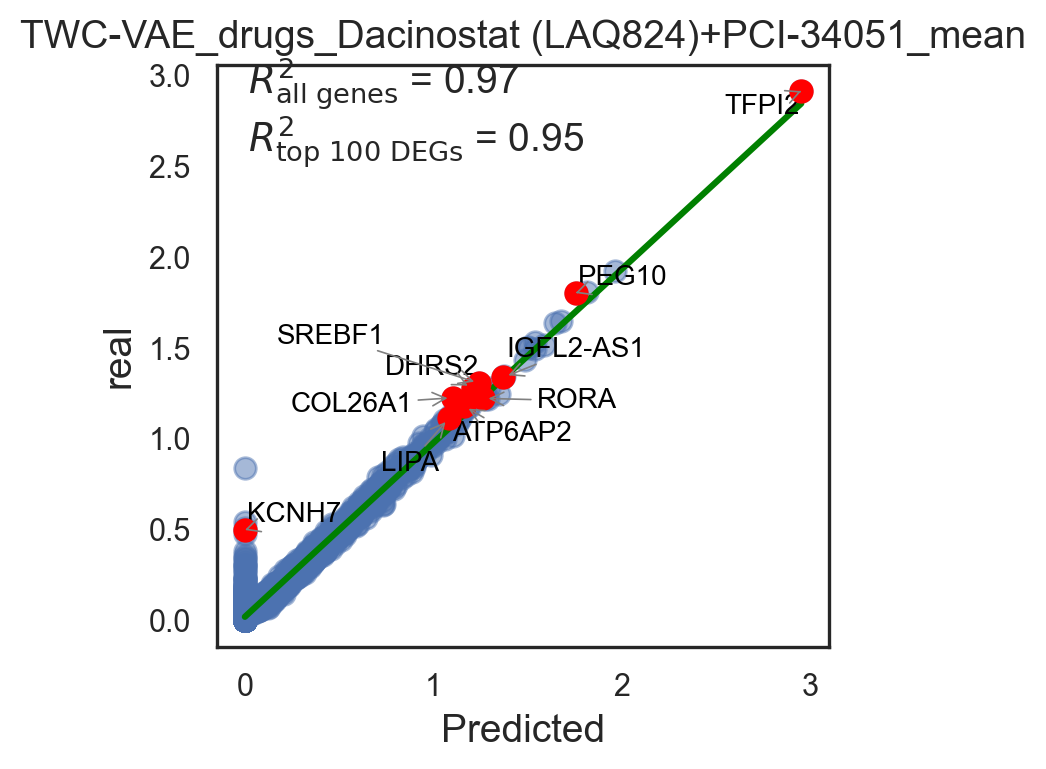

R-squared for top genes: 0.65
R-squared for all genes: 0.62


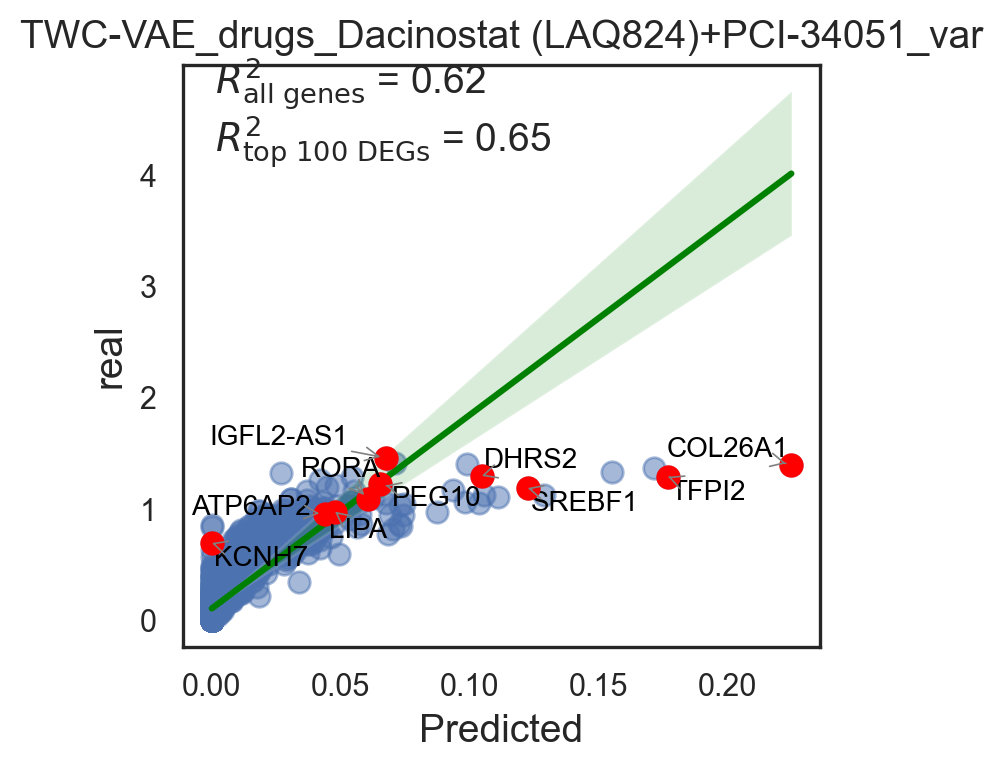

In [294]:
import scanpy as sc
result = sc.read(f"./coupleVAE{data_name}_{cell_type}_{pert_key}.h5ad")

sc.tl.rank_genes_groups(result, groupby="condition", n_genes=20, method="wilcoxon")

diff_genes_covid = result.uns["rank_genes_groups"]["names"][f"{cell_type}_real_pert"]

conditions = {
    "ctrl": f"{cell_type}_ctrl",
    "pred_stim": f"{cell_type}_pred_pert",
    "real_stim": f"{cell_type}_real_pert"
}

plot_gene_correlation(data=result,
                      cond_col="condition",
                      axes_map={"x": conditions["pred_stim"], "y": conditions["real_stim"]},
                      label_map={"x": "Predicted", "y": "real"},
                      genes_of_interest=diff_genes_covid[:10],
                      top_genes=diff_genes_covid,
                      reg_type='mean',  # 或 'var'
                      plot_title=f"TWC-VAE_{data_name}_{pert_key}_mean",
                      show_plot=True,
                    #   fontsize=12,
                      include_legend=False)
plot_gene_correlation(data=result,
                      cond_col="condition",
                      axes_map={"x": conditions["pred_stim"], "y": conditions["real_stim"]},
                      label_map={"x": "Predicted", "y": "real"},
                      genes_of_interest=diff_genes_covid[:10],
                      top_genes=diff_genes_covid,
                      reg_type='var',  # 或 'var'
                      plot_title=f"TWC-VAE_{data_name}_{pert_key}_var",
                      show_plot=True,
                    #   fontsize=12,
                      include_legend=False)
# plot_gene_correlation(result, 
#                       cond_col="condition",
#                       axes_map={"x": conditions["pred_stim"], "y": conditions["real_stim"]},
#                       genes_of_interest=diff_genes_covid[:10],  # 显示前10个
#                       top_genes=diff_genes_covid,
#                       include_legend=False,
#                       label_map={"x": "pred", "y": "real"},
#                       plot_title=f"CoupleVAE_{data_name}_{cell_type}",
#                       show_plot=True)

# plot_gene_correlation(result, 
#                       cond_col="condition",
#                       axes_map={"x": conditions["pred_stim"], "y": conditions["real_stim"]},
#                       genes_of_interest=diff_genes_covid[:5],
#                       top_genes=diff_genes_covid,
#                       include_legend=False,
#                       label_map={"x": "pred", "y": "real"},
#                       plot_title=f"CoupleVAE_{cell_type}",
#                     #   file_path=f"./CoupleVAE_{cell_type}.pdf",
#                       # file_path=None,
#                       show_plot=True)


In [295]:
# 直接列出所有基因名（通常为 var_names）
print(adata.var_names)


Index(['TENM1', 'TTN', 'TRHDE', 'PPP1R3A', 'NDST4', 'CLCN4', 'NR1H4', 'CT55',
       'SGCZ', 'ACSBG1',
       ...
       'MPND', 'KLHL35', 'nan-13', 'MTND2P28', 'RNY3P11', 'IMPG1', 'GNAO1',
       'LRRC4C', 'SYK', 'ENC1'],
      dtype='object', length=5000)


d:\anaconda\envs\couplevae_env\Lib\site-packages\scanpy\neighbors\__init__.py:586: UserWarning: You’re trying to run this on 5000 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  X = _choose_representation(self._adata, use_rep=use_rep, n_pcs=n_pcs)


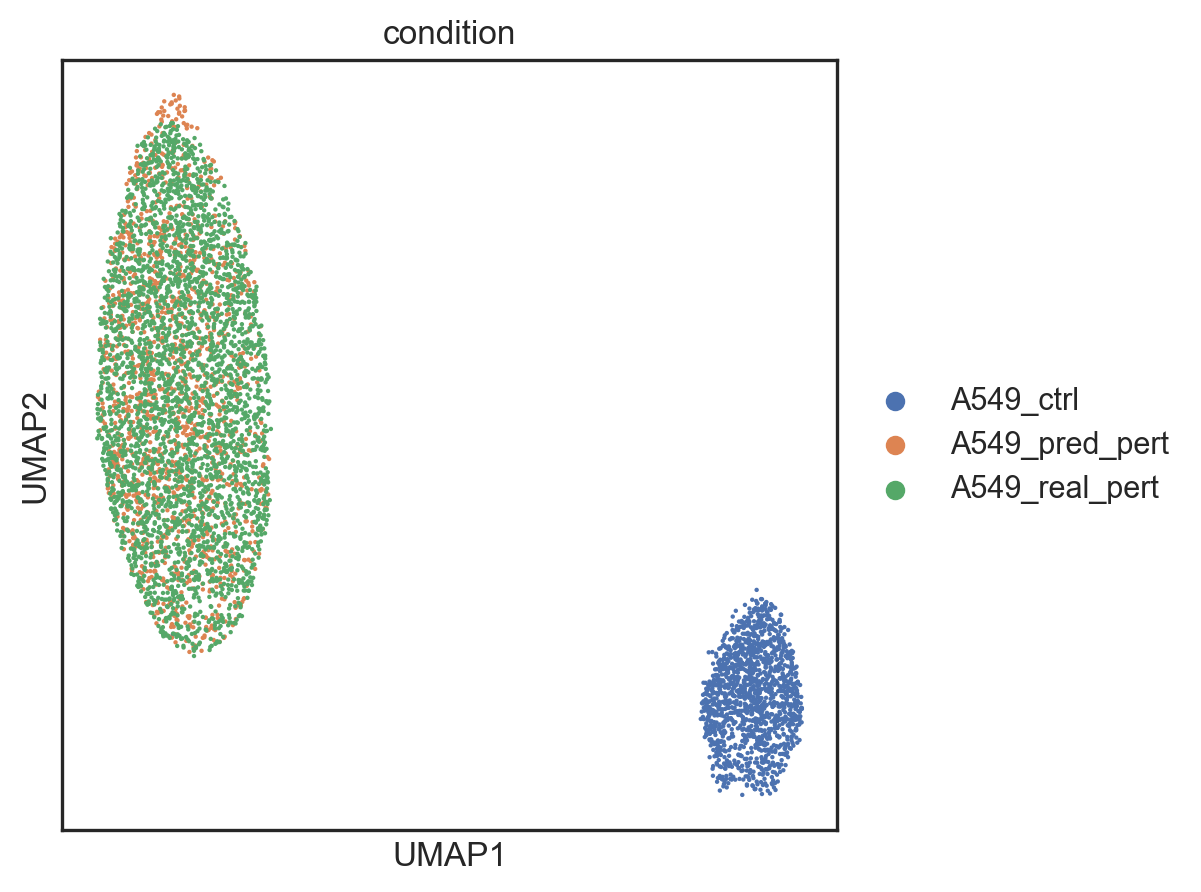

In [296]:
sc.pp.neighbors(result,n_neighbors=50)
sc.tl.umap(result)


import scanpy as sc
import matplotlib.pyplot as plt

# 先画图，返回 matplotlib 的 Axes 对象
ax = sc.pl.umap(result,
                color='condition',
                frameon=True,
                size=10,
                show=False,  # 先不显示
                return_fig=True)  # 返回 matplotlib Figure

# 设置标题、尺寸
fig = plt.gcf()  # 获取当前图像
fig.set_size_inches(5, 5)  # 设置尺寸
# ax[0].set_title("UMAP of CD4T under Different Conditions", fontsize=14)

plt.show()


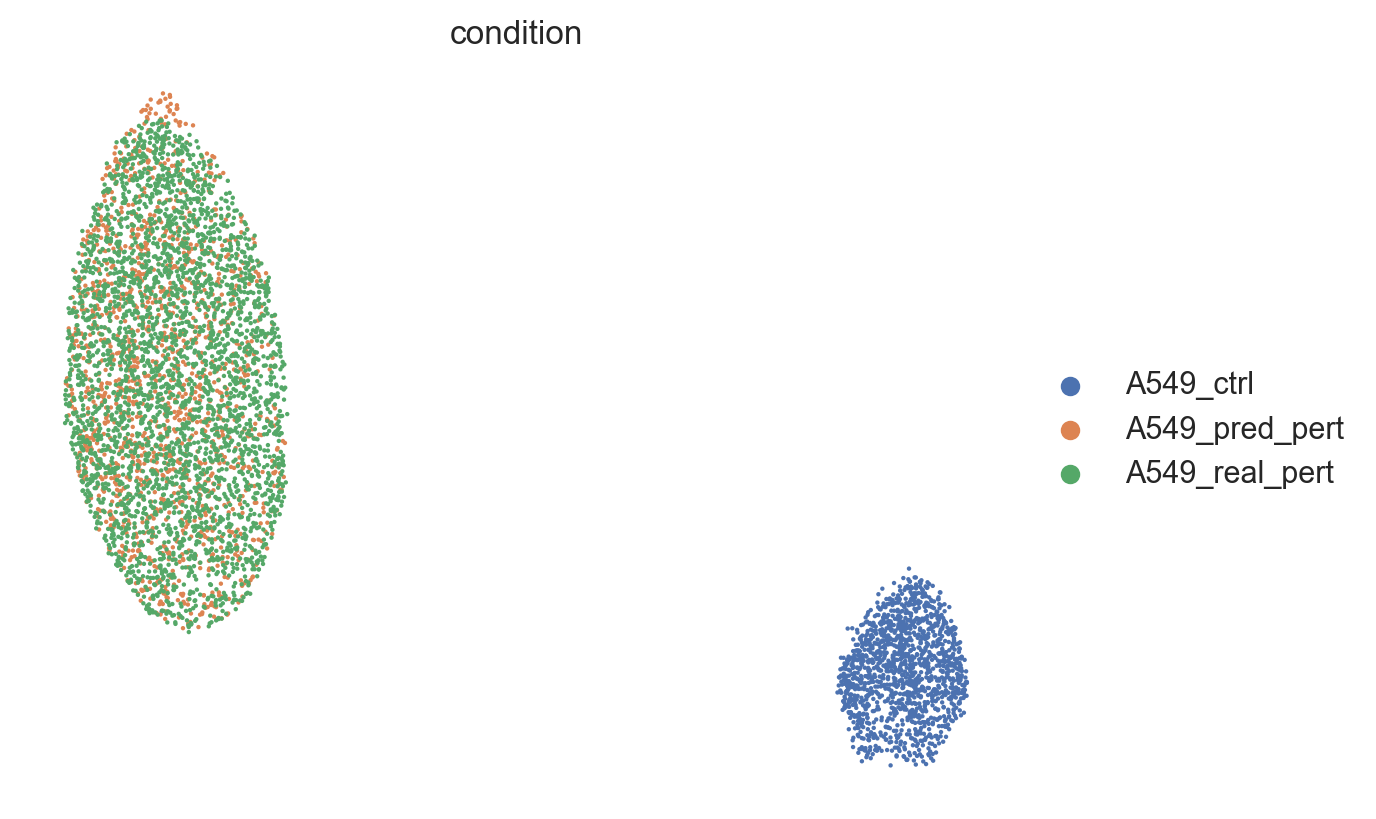

In [297]:


sc.pl.umap(result,
           color=['condition'],
           frameon=False,
           wspace=0.5,
           size=10)


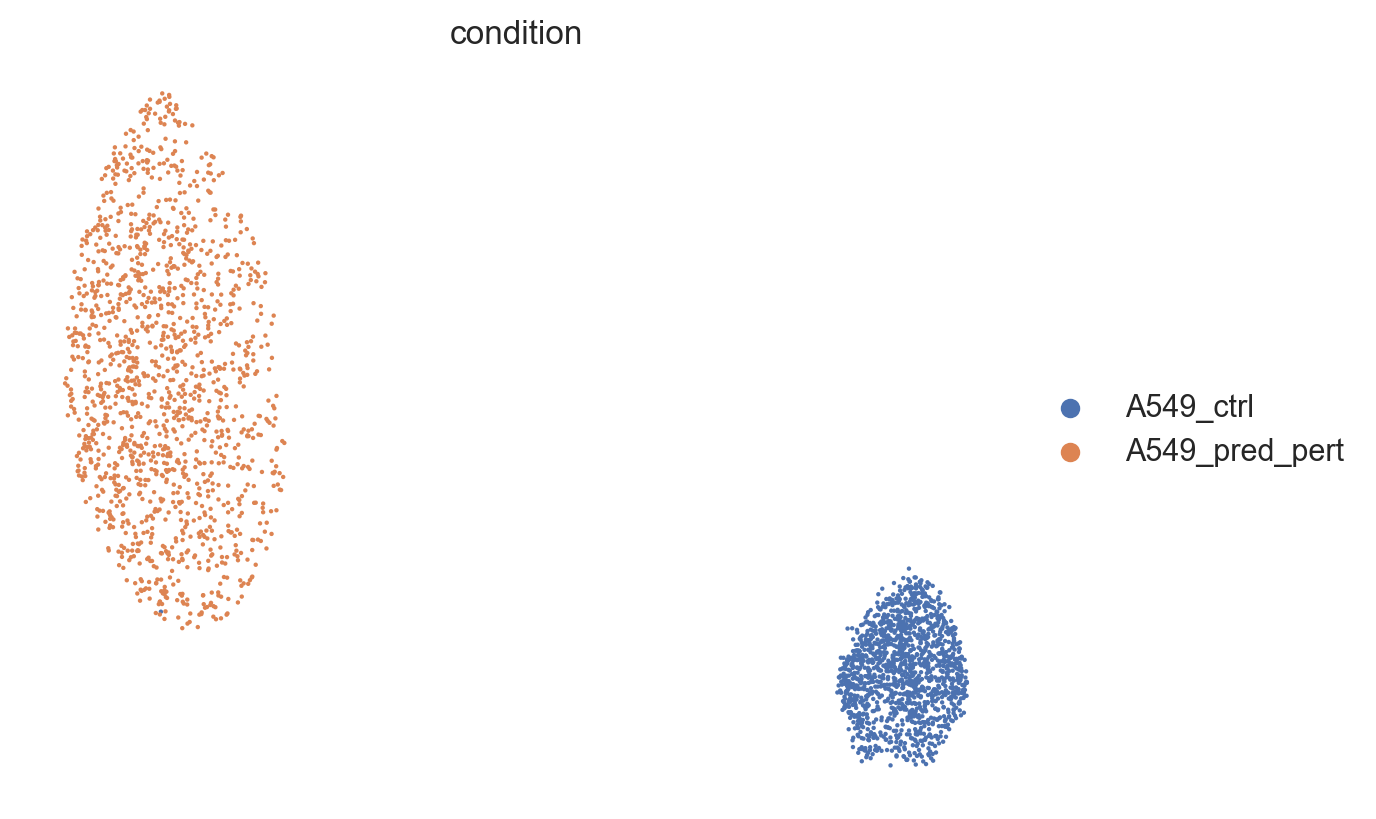

In [298]:
subset_result = result[result.obs['condition'].isin(['A549_ctrl', 'A549_pred_pert'])]

sc.pl.umap(subset_result,
           color=['condition'],
           frameon=False,
           wspace=0.1,
           size=10)


In [299]:
result.obs['cell_type']

0-0       A549
1-0       A549
2-0       A549
3-0       A549
4-0       A549
          ... 
3293-2    A549
3294-2    A549
3295-2    A549
3296-2    A549
3297-2    A549
Name: cell_type, Length: 6200, dtype: category
Categories (1, object): ['A549']

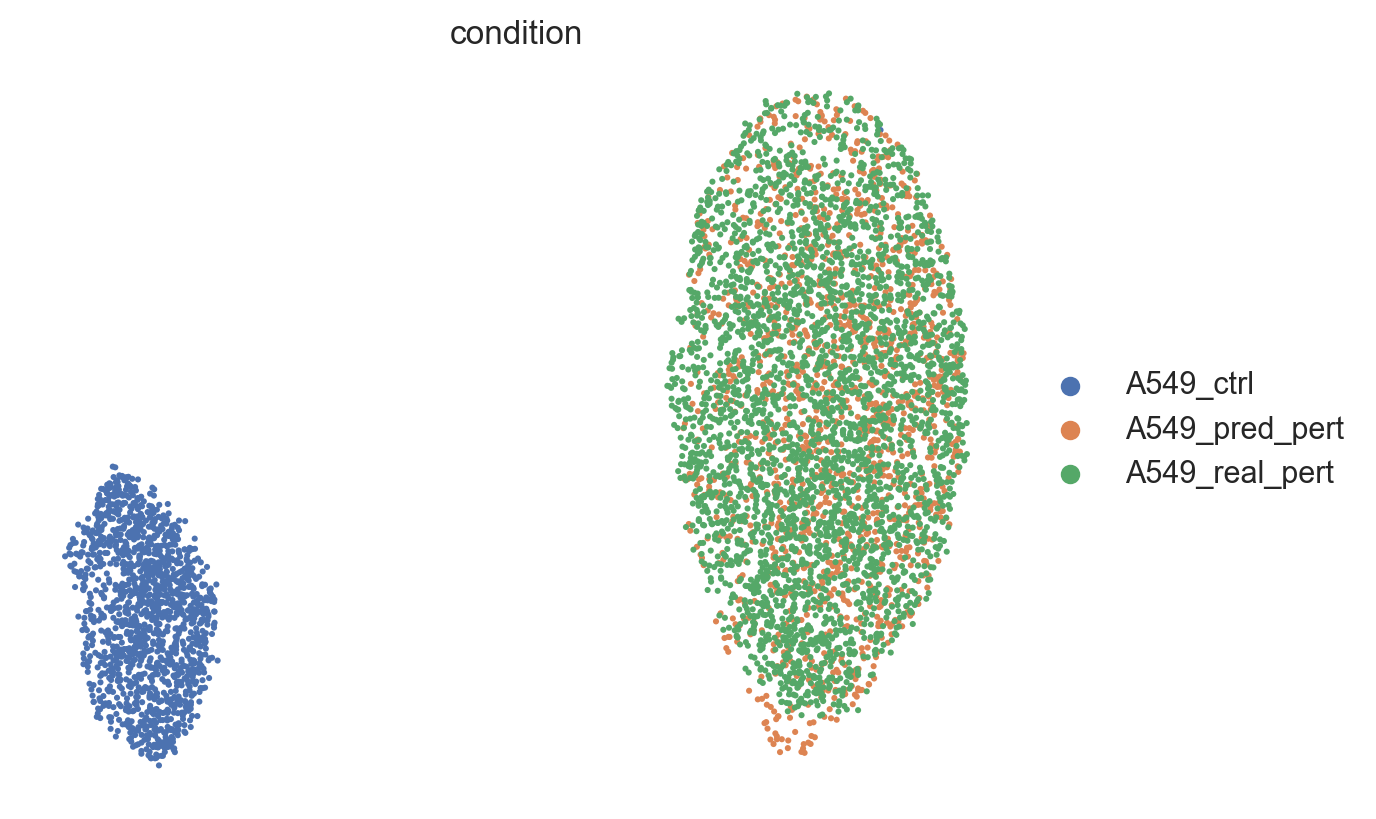

In [300]:
sc.pp.neighbors(result)
sc.tl.umap(result)

sc.pl.umap(result,
           color=['condition'],
           frameon=False,
           wspace=0.3)

In [301]:
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def plot_violin_compare_pert(adata,
                              genes,
                              condition_key='condition',
                              ctrl_label='A549_ctrl',
                              real_label='A549_real_pert',
                              pred_label='A549_pred_pert',
                              cell_type='A549',
                              save_path=None,
                              show=True,
                              return_figs=False,
                              figsize=(4, 3),
                              fontsize=12):
    """
    绘制小提琴图，对比 ctrl、真实扰动和预测扰动的表达分布，并显示散点。
    """
    # 筛选三类条件
    valid_labels = [ctrl_label, pred_label, real_label]
    subset = adata[adata.obs[condition_key].isin(valid_labels)]

    figs = []
    for gene in genes:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_axes([0.2, 0.2, 0.7, 0.7])
        
        sc.pl.violin(subset,
                     keys=gene,
                     groupby=condition_key,
                     ax=ax,
                     stripplot=True,    # 显示散点
                     jitter=True,       # 增加抖动
                     show=False)
        
        ax.set_title(f'Expression of {gene} in {cell_type}', fontsize=fontsize)
        ax.set_ylabel("Expression", fontsize=fontsize)
        ax.set_xlabel("Condition", fontsize=fontsize)
        ax.tick_params(labelsize=fontsize - 2)
        figs.append(fig)

    # 保存 PDF
    if save_path:
        with PdfPages(save_path) as pdf:
            for fig in figs:
                pdf.savefig(fig, bbox_inches='tight', dpi=300)
                plt.close(fig)

    # 显示
    if show:
        for fig in figs:
            fig.show()

    # 返回对象
    if return_figs:
        return figs


C:\Users\jerry-ai\AppData\Local\Temp\ipykernel_34656\1904886986.py:53: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


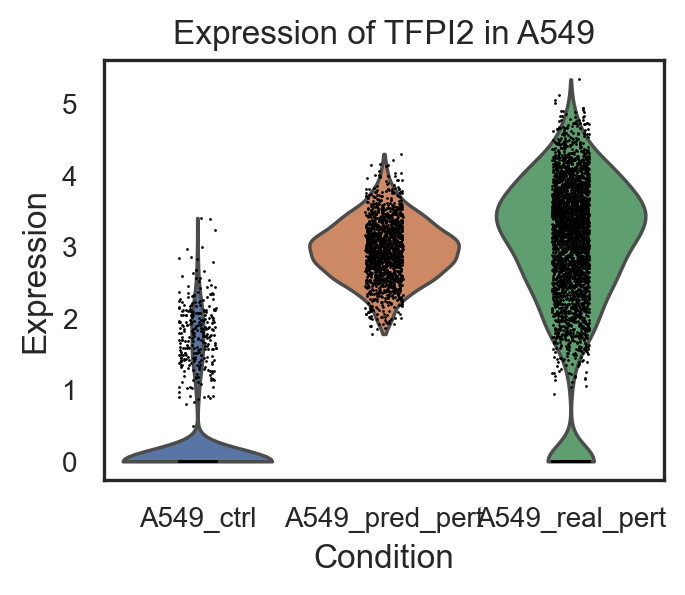

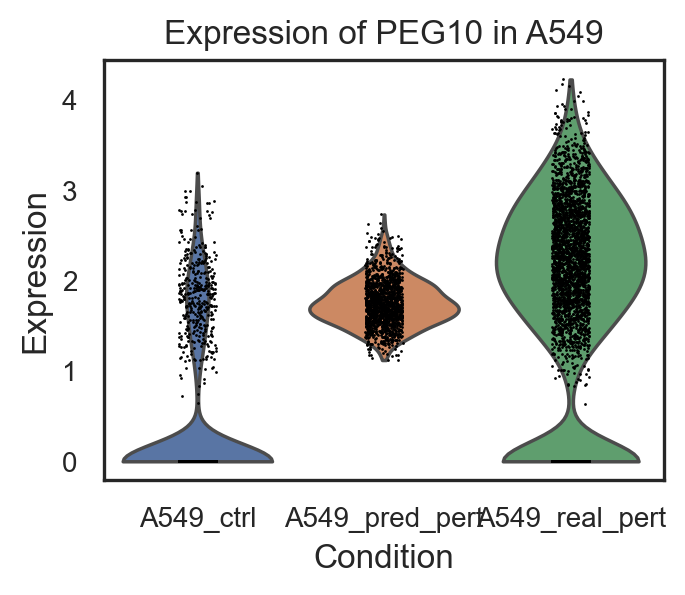

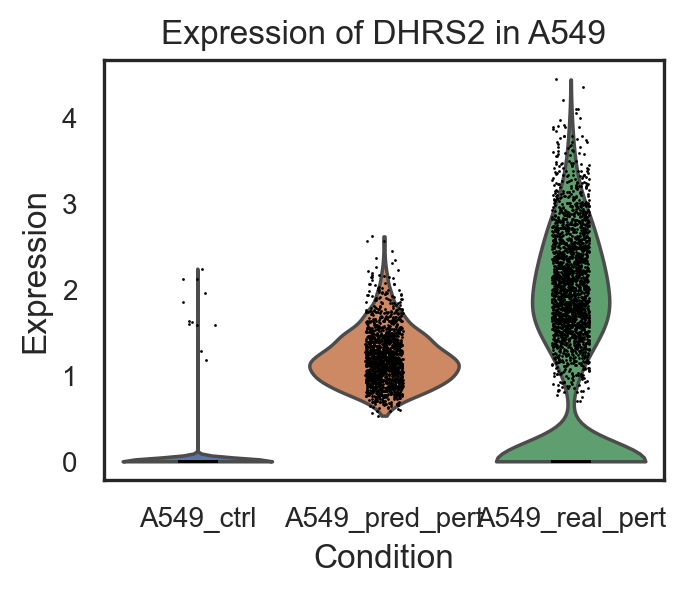

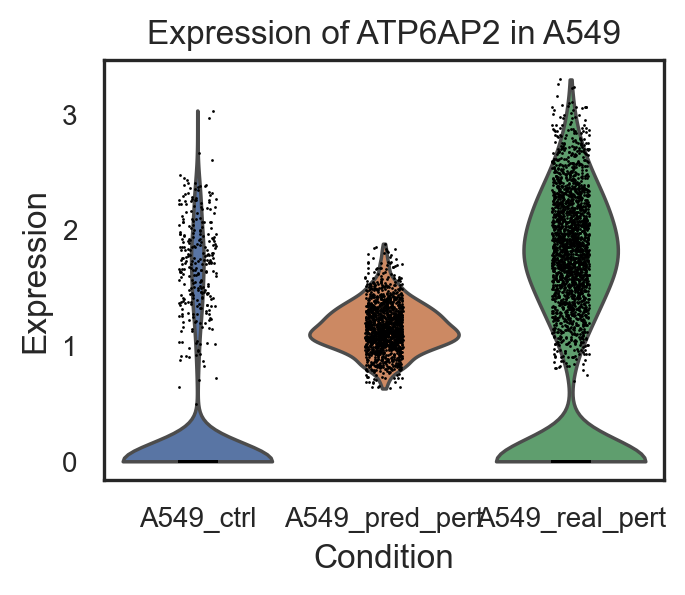

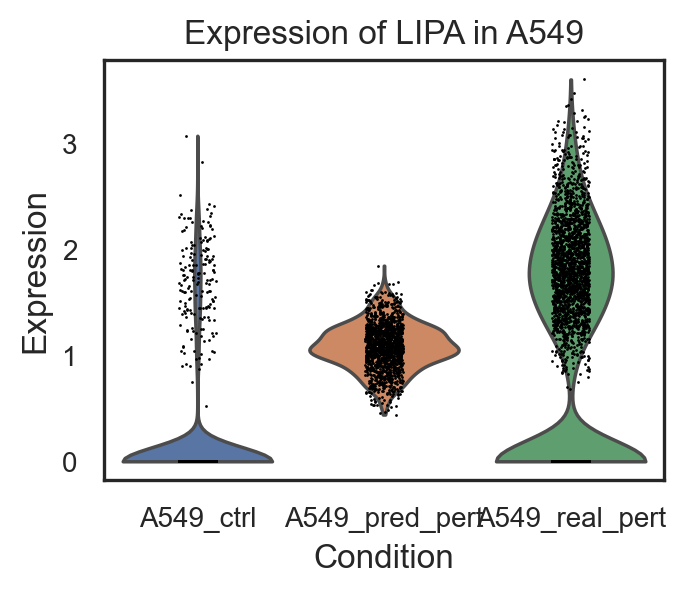

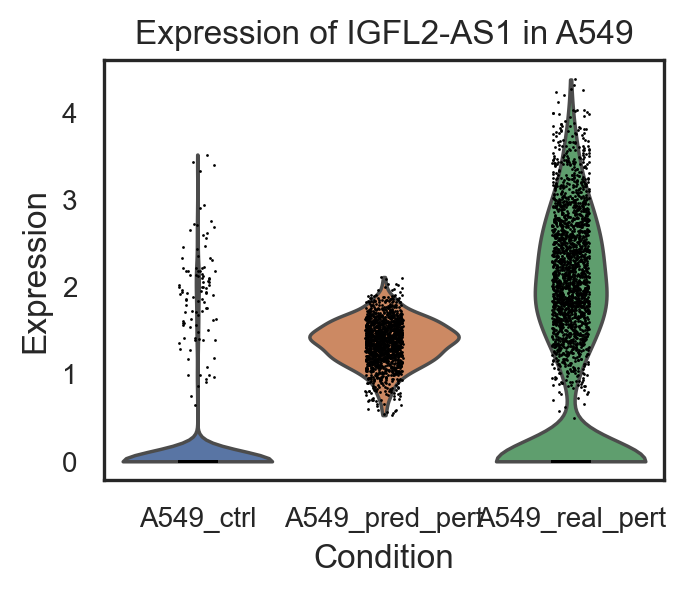

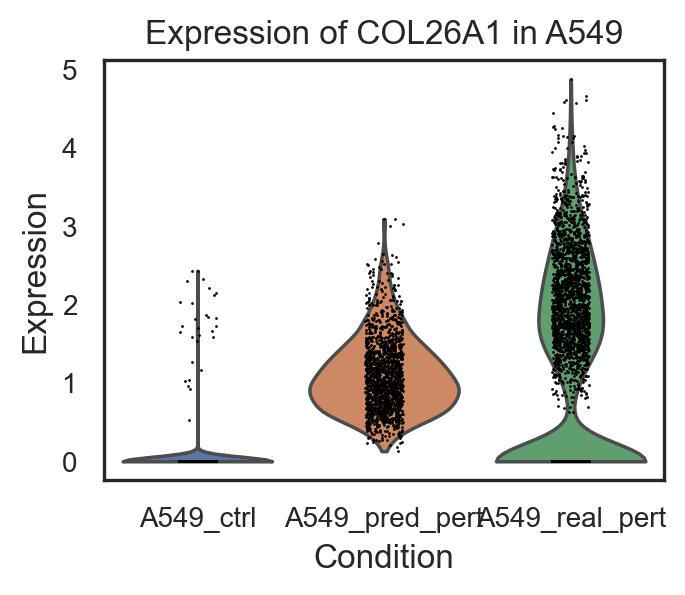

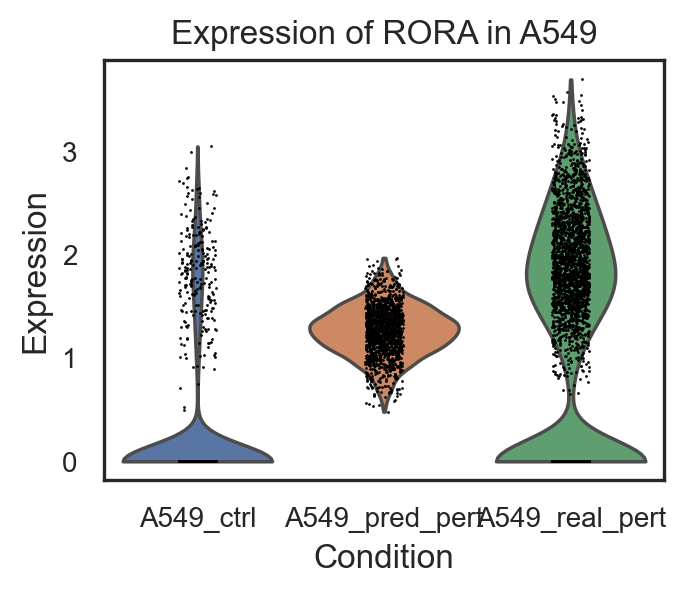

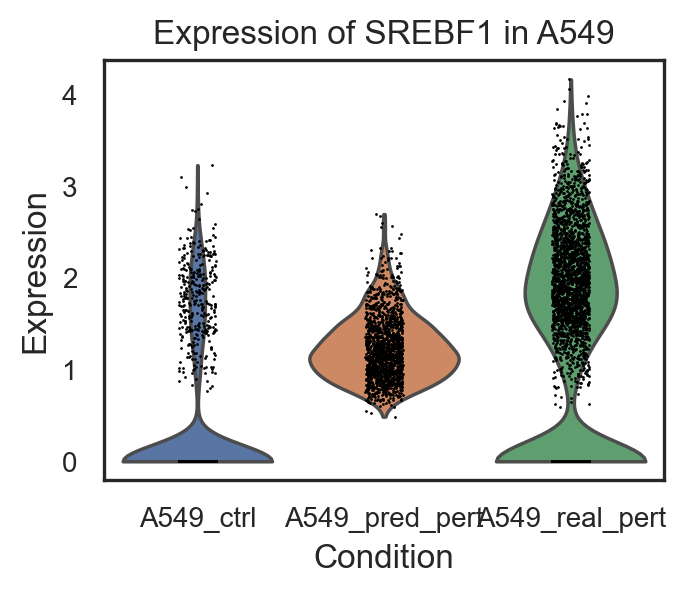

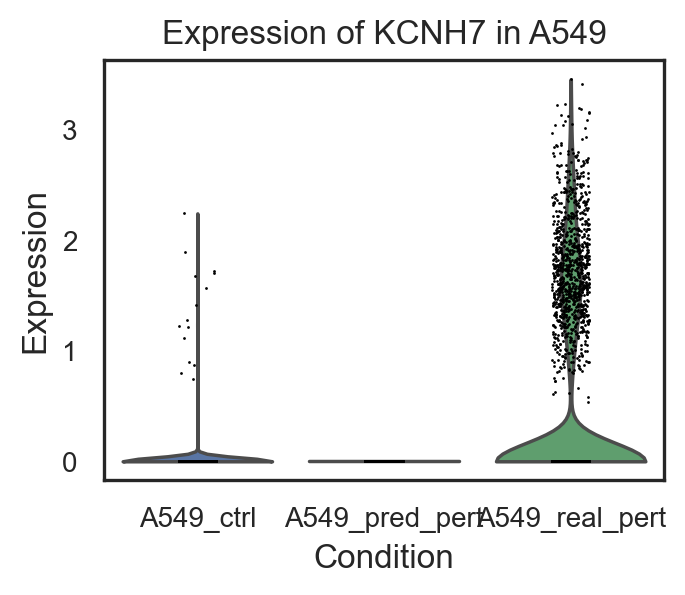

In [302]:
plot_violin_compare_pert(result,
                         genes=diff_genes_covid[:10],
                         ctrl_label='A549_ctrl',
                         real_label='A549_real_pert',
                         pred_label='A549_pred_pert',
                         cell_type='A549',
                        #  save_path='./violin_compare_DEGs.pdf',
                         show=True)


In [303]:
from scipy.stats import wasserstein_distance
import numpy as np
import pandas as pd

def compute_wasserstein(adata, gene, real_label, pred_label, condition_key='condition'):
    gene_idx = adata.var_names.get_loc(gene)

    real_expr = adata[adata.obs[condition_key] == real_label].X[:, gene_idx]
    pred_expr = adata[adata.obs[condition_key] == pred_label].X[:, gene_idx]

    if not isinstance(real_expr, np.ndarray):
        real_expr = real_expr.toarray().flatten()
    else:
        real_expr = real_expr.flatten()

    if not isinstance(pred_expr, np.ndarray):
        pred_expr = pred_expr.toarray().flatten()
    else:
        pred_expr = pred_expr.flatten()

    return wasserstein_distance(real_expr, pred_expr)

def compute_wasserstein_for_genes(adata, genes, real_label, pred_label, condition_key='condition'):
    results = []
    for gene in genes:
        try:
            wass = compute_wasserstein(adata, gene, real_label, pred_label, condition_key)
            results.append({
                'gene': gene,
                'wasserstein': wass
            })
        except Exception as e:
            print(f"⚠️ Gene {gene} failed: {e}")
    return pd.DataFrame(results)

# ✅ 获取所有基因名
all_genes = result.var_names.tolist()

# ✅ 计算全部基因的 Wasserstein 距离
df_wass = compute_wasserstein_for_genes(
    result,
    genes=all_genes,
    real_label='CD4T_real_pert',
    pred_label='CD4T_pred_pert',
    condition_key='condition'
)

# ✅ 查看前几行结果
# print(df_wass.head())
# 计算平均 Wasserstein 距离
mean_wass = df_wass['wasserstein'].mean()
print(f"平均 Wasserstein 距离：{mean_wass:.4f}")

# 计算中位数 Wasserstein 距离
median_wass = df_wass['wasserstein'].median()
print(f"中位数 Wasserstein 距离：{median_wass:.4f}")


⚠️ Gene TENM1 failed: Distribution can't be empty.
⚠️ Gene TTN failed: Distribution can't be empty.
⚠️ Gene TRHDE failed: Distribution can't be empty.
⚠️ Gene PPP1R3A failed: Distribution can't be empty.
⚠️ Gene NDST4 failed: Distribution can't be empty.
⚠️ Gene CLCN4 failed: Distribution can't be empty.
⚠️ Gene NR1H4 failed: Distribution can't be empty.
⚠️ Gene CT55 failed: Distribution can't be empty.
⚠️ Gene SGCZ failed: Distribution can't be empty.
⚠️ Gene ACSBG1 failed: Distribution can't be empty.
⚠️ Gene LINC02476 failed: Distribution can't be empty.
⚠️ Gene FRMPD4 failed: Distribution can't be empty.
⚠️ Gene LINC00624 failed: Distribution can't be empty.
⚠️ Gene CPA4 failed: Distribution can't be empty.
⚠️ Gene ROBO2 failed: Distribution can't be empty.
⚠️ Gene DSCAM failed: Distribution can't be empty.
⚠️ Gene LSAMP failed: Distribution can't be empty.
⚠️ Gene TEX41 failed: Distribution can't be empty.
⚠️ Gene CNTN5 failed: Distribution can't be empty.
⚠️ Gene CXCL8 failed: Di

KeyError: 'wasserstein'

In [305]:
from scipy.stats import wasserstein_distance
from scipy.stats import wasserstein_distance
import numpy as np

def compute_wasserstein(adata, gene, real_label, pred_label, condition_key='condition'):
    gene_idx = adata.var_names.get_loc(gene)

    real_expr = adata[adata.obs[condition_key] == real_label].X[:, gene_idx]
    pred_expr = adata[adata.obs[condition_key] == pred_label].X[:, gene_idx]

    if not isinstance(real_expr, np.ndarray):
        real_expr = real_expr.toarray().flatten()
    else:
        real_expr = real_expr.flatten()

    if not isinstance(pred_expr, np.ndarray):
        pred_expr = pred_expr.toarray().flatten()
    else:
        pred_expr = pred_expr.flatten()

    return wasserstein_distance(real_expr, pred_expr)

def compute_wasserstein_for_genes(adata, genes, real_label, pred_label, condition_key='condition'):
    results = []
    for gene in genes:
        wass = compute_wasserstein(adata, gene, real_label, pred_label, condition_key)
        results.append({
            'gene': gene,
            'wasserstein': wass
        })
    return pd.DataFrame(results)
df_wass = compute_wasserstein_for_genes(
    result,
    genes=diff_genes_covid[:5],
    real_label='CD4T_real_pert',
    pred_label='CD4T_pred_pert',
    condition_key='condition'
)

print(df_wass.sort_values(by='wasserstein'))


ValueError: Distribution can't be empty.

C:\Users\jerry-ai\AppData\Local\Temp\ipykernel_34656\4079775148.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(real_expr, label='Real', shade=True)
C:\Users\jerry-ai\AppData\Local\Temp\ipykernel_34656\4079775148.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pred_expr, label='Pred', shade=True)


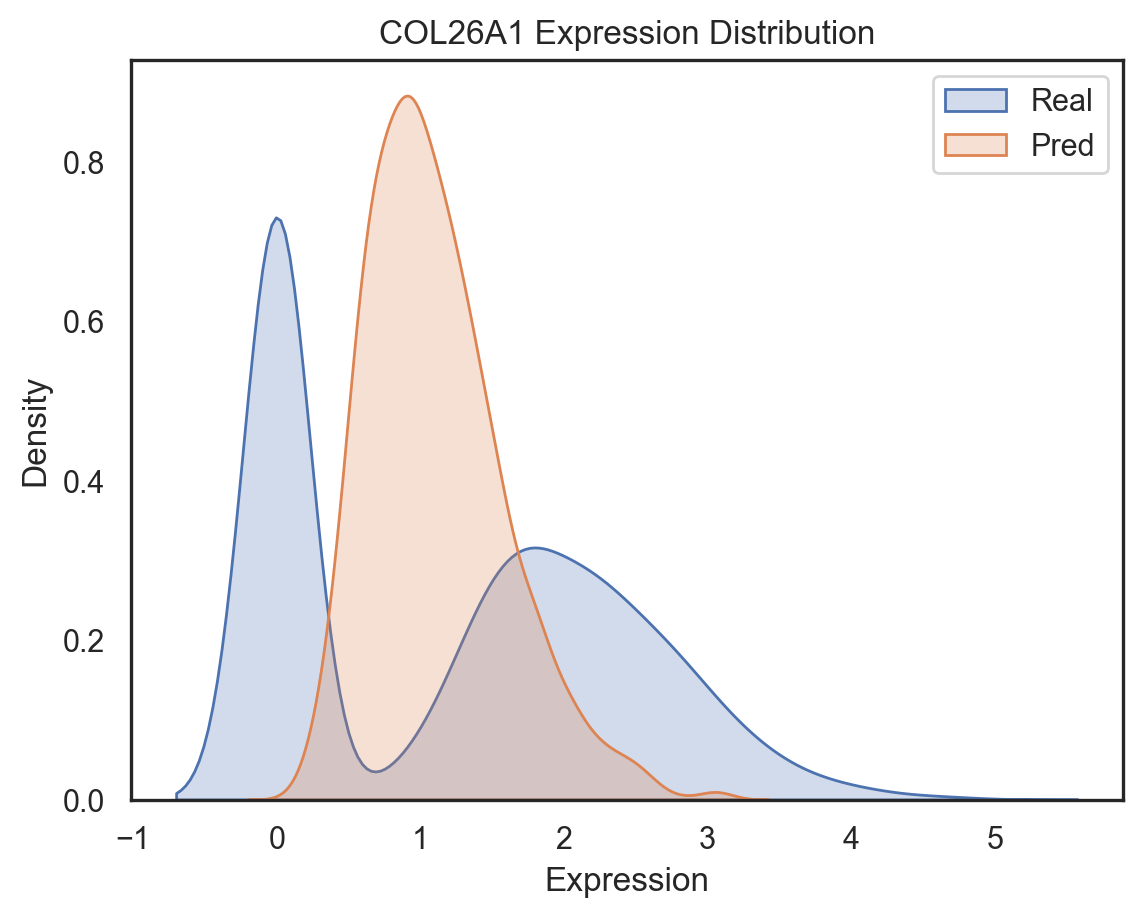

In [306]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_gene_distribution(adata, gene, real_label, pred_label, condition_key='condition'):
    gene_idx = adata.var_names.get_loc(gene)

    real_expr = adata[adata.obs[condition_key] == real_label].X[:, gene_idx]
    pred_expr = adata[adata.obs[condition_key] == pred_label].X[:, gene_idx]

    if not isinstance(real_expr, np.ndarray):
        real_expr = real_expr.toarray().flatten()
    else:
        real_expr = real_expr.flatten()

    if not isinstance(pred_expr, np.ndarray):
        pred_expr = pred_expr.toarray().flatten()
    else:
        pred_expr = pred_expr.flatten()

    sns.kdeplot(real_expr, label='Real', shade=True)
    sns.kdeplot(pred_expr, label='Pred', shade=True)
    plt.title(f'{gene} Expression Distribution')
    plt.xlabel('Expression')
    plt.ylabel('Density')
    plt.legend()
    plt.show()


# 示例画 B2M 的表达分布对比
plot_gene_distribution(result, 'COL26A1', 'A549_real_pert', 'A549_pred_pert')


In [307]:
result.obs['condition']

0-0            A549_ctrl
1-0            A549_ctrl
2-0            A549_ctrl
3-0            A549_ctrl
4-0            A549_ctrl
               ...      
3293-2    A549_real_pert
3294-2    A549_real_pert
3295-2    A549_real_pert
3296-2    A549_real_pert
3297-2    A549_real_pert
Name: condition, Length: 6200, dtype: category
Categories (3, object): ['A549_ctrl', 'A549_pred_pert', 'A549_real_pert']

In [308]:
import scanpy as sc

# 选择分析目标：真实扰动 vs 控制组
adata = result
adata_real = adata[adata.obs['condition'].isin(['A549_ctrl', 'A549_real_pert'])].copy()

# 标准差异表达分析（使用 Wilcoxon）
sc.tl.rank_genes_groups(adata_real, groupby='condition', reference='A549_ctrl',
                        groups=['A549_real_pert'], method='wilcoxon')

# 保存结果为数据框
real_deg = sc.get.rank_genes_groups_df(adata_real, group='A549_real_pert')


In [309]:
adata_pred = adata[adata.obs['condition'].isin(['A549_ctrl', 'A549_pred_pert'])].copy()

sc.tl.rank_genes_groups(adata_pred, groupby='condition', reference='A549_ctrl',
                        groups=['A549_pred_pert'], method='wilcoxon')

pred_deg = sc.get.rank_genes_groups_df(adata_pred, group='A549_pred_pert')

In [310]:
# 设置筛选阈值（如 log2FC > 1 且 p < 0.05）
real_sig = real_deg[(real_deg['logfoldchanges'].abs() > 1) & (real_deg['pvals_adj'] < 0.05)]
pred_sig = pred_deg[(pred_deg['logfoldchanges'].abs() > 1) & (pred_deg['pvals_adj'] < 0.05)]
real_sig,pred_sig

(          names     scores  logfoldchanges          pvals      pvals_adj
 0         TFPI2  48.291996        5.446096   0.000000e+00   0.000000e+00
 1         PEG10  33.358891        3.005761  5.413547e-244  3.383467e-241
 2         DHRS2  32.985226        7.482782  1.323079e-238  7.350441e-236
 3       COL26A1  30.559797        6.122812  4.190401e-205  1.904728e-202
 4     IGFL2-AS1  29.886240        4.290240  2.970441e-196  1.237684e-193
 ...         ...        ...             ...            ...            ...
 4995       CA12 -34.394527       -3.025887  3.044413e-259  2.537011e-256
 4996      MGST1 -34.740208       -3.447094  1.948242e-264  1.948242e-261
 4997     TUBA1B -36.558434       -3.736606  1.309765e-292  1.637206e-289
 4998      ABCC2 -41.478748       -3.277426   0.000000e+00   0.000000e+00
 4999    AKR1B10 -47.303001       -4.168291   0.000000e+00   0.000000e+00
 
 [1065 rows x 5 columns],
          names     scores  logfoldchanges          pvals      pvals_adj
 0         

In [311]:
# 以 log2FC 作为排序依据，构建 GSEA 输入
# 你需要一个 pandas.Series，index 是基因名，value 是 log2FC
ranked_real = real_deg.set_index('names')['logfoldchanges'].sort_values(ascending=False)
ranked_pred = pred_deg.set_index('names')['logfoldchanges'].sort_values(ascending=False)

In [312]:
import gseapy as gp
# GSEA for real
real_gsea = gp.prerank(
    rnk=ranked_real,
    gene_sets='KEGG_2021_Human',
    processes=4,
    permutation_num=100,
    outdir=None,
    seed=42
)

# GSEA for predicted
pred_gsea = gp.prerank(
    rnk=ranked_pred,
    gene_sets='KEGG_2021_Human',
    processes=4,
    permutation_num=100,
    outdir=None,
    seed=42
)


C:\Users\jerry-ai\AppData\Local\Temp\ipykernel_34656\3433109990.py:3: DeprecationWarning: processes is deprecated; use threads
  real_gsea = gp.prerank(
2025-07-13 20:43:52,553 [WARNING] Duplicated values found in preranked stats: 1.16% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
C:\Users\jerry-ai\AppData\Local\Temp\ipykernel_34656\3433109990.py:13: DeprecationWarning: processes is deprecated; use threads
  pred_gsea = gp.prerank(
2025-07-13 20:43:52,754 [WARNING] Duplicated values found in preranked stats: 12.52% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


In [ ]:
df_real = real_gsea.res2d.copy()
df_pred = pred_gsea.res2d.copy()

# 找出共同通路
common_terms = set(df_real.index) & set(df_pred.index)
print(f"共同富集通路数: {len(common_terms)}")

共同富集通路数: 198


In [ ]:
# NES 数据存储在 .res2d 中
df_real = real_gsea.res2d.reset_index().rename(columns={"Term": "Pathway", "NES": "NES_real"})
df_pred = pred_gsea.res2d.reset_index().rename(columns={"Term": "Pathway", "NES": "NES_pred"})

In [ ]:
print(df_pred)

     index     Name                                            Pathway  \
0        0  prerank                          mRNA surveillance pathway   
1        1  prerank  Endocrine and other factor-regulated calcium r...   
2        2  prerank                                           Ribosome   
3        3  prerank                                     Oocyte meiosis   
4        4  prerank                                         Cell cycle   
..     ...      ...                                                ...   
193    193  prerank                              Amphetamine addiction   
194    194  prerank            Transcriptional misregulation in cancer   
195    195  prerank                  Thyroid hormone signaling pathway   
196    196  prerank                Aldosterone synthesis and secretion   
197    197  prerank                                        Endocytosis   

           ES  NES_pred NOM p-val FDR q-val FWER p-val  Tag %  Gene %  \
0   -0.728273 -1.373045       0.0  0.2

In [ ]:
def plot_top_common_pathways_from_df(
        df_real, df_pred,
        score_col_real='NES_real',
        score_col_pred='NES_pred',
        term_col='Pathway',
        top_n=20,
        title="Top Pathway NES Comparison",
        same_direction=True,          # 新增：是否要求 NES 同号
        wrap_width=40                 # 可调：通路名换行宽度
    ):
    """
    对比真实组和预测组 GSEA 结果中 NES 同向的重叠通路
    ...

    same_direction : bool
        True  → 仅保留 NES_real 和 NES_pred 同号（同向富集）通路  
        False → 只取两表交集，不管 NES 方向
    """
    import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, textwrap

    # 1) 合并两张表
    df_merged = pd.merge(
        df_real[[term_col, score_col_real]],
        df_pred[[term_col, score_col_pred]],
        on=term_col,
        how='inner'
    )

    # 2) 方向一致过滤（可选）
    if same_direction:
        df_merged = df_merged[
            (df_merged[score_col_real] * df_merged[score_col_pred]) > 0
        ]

    print(f"方向一致的重叠通路数: {len(df_merged)}")

    # 3) 长表 & 其余绘图逻辑保持不变
    df_long = pd.melt(df_merged,
                      id_vars=[term_col],
                      value_vars=[score_col_real, score_col_pred],
                      var_name='Condition',
                      value_name='Score')

    df_long['Condition'] = df_long['Condition'].map({
        score_col_real: 'Stimulus',
        score_col_pred: 'Predict'
    })

    wrap = lambda t: '\n'.join(textwrap.wrap(str(t), width=wrap_width))
    df_long['Term_wrapped'] = df_long[term_col].apply(wrap)

    top_terms = (df_long.groupby(term_col)['Score']
                 .mean().abs().sort_values(ascending=False)
                 .head(top_n).index)
    df_long = df_long[df_long[term_col].isin(top_terms)]

    order = df_long.groupby(term_col)['Score'].mean().loc[top_terms[::-1]]
    df_long['Term_wrapped'] = pd.Categorical(
        df_long['Term_wrapped'],
        categories=[wrap(t) for t in order.index],
        ordered=True)

    plt.figure(figsize=(12, max(6, 0.4 * top_n)))
    ax = sns.barplot(data=df_long, x='Score', y='Term_wrapped',
                     hue='Condition',
                     palette={'Predict': 'skyblue', 'Stimulus': 'hotpink'})

    for c in ax.containers:
        ax.bar_label(c, fmt="%.2f", label_type="edge", padding=3)

    plt.axvline(0, color='black', linestyle='--')
    plt.title(title)
    plt.xlabel("Normalized Enrichment Score (NES)")
    plt.ylabel("Pathway")
    plt.legend(title='Condition', loc='lower right')
    plt.tight_layout()
    plt.show()


In [ ]:
def plot_top_common_pathways_bubble(
        df_real, df_pred,
        score_col_real='NES_real',
        score_col_pred='NES_pred',
        term_col='Pathway',
        top_n=20,
        title="Stimulus vs. Predict NES (Bubble)",
        same_direction=False,          # True→只保留同向；False→同时看匹配与失配
        size_scale=200,                # 气泡放大因子
        annotate=True,                 # 是否在点旁标注通路名
        wrap_width=35                  # 通路名自动换行宽度
    ):
    """
    以气泡图比较 Stimulus 与 Predict 的 NES：
    x 轴 = Stimulus NES，y 轴 = Predict NES，气泡大小 = |NES| 平均。
    """
    import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, textwrap

    # 1) 合并两张表
    df_merge = pd.merge(
        df_real[[term_col, score_col_real]],
        df_pred[[term_col, score_col_pred]],
        on=term_col, how='inner'
    )

    # 2) 过滤同向（可选）
    if same_direction:
        df_merge = df_merge[(df_merge[score_col_real] * df_merge[score_col_pred]) > 0]

    # 3) 只取 top_n（按两列绝对 NES 均值排序）
    df_merge['abs_mean'] = (df_merge[score_col_real].abs() + df_merge[score_col_pred].abs()) / 2
    df_top = (df_merge.sort_values('abs_mean', ascending=False)
                        .head(top_n)
                        .copy())

    # 4) 计算绘图数据
    df_top['BubbleSize'] = df_top['abs_mean'] * size_scale
    df_top['SameDir'] = np.sign(df_top[score_col_real]) == np.sign(df_top[score_col_pred])

    # 5) 绘图
    plt.figure(figsize=(8, 8))
    palette = {True: "steelblue", False: "salmon"}  # 可自定义
    sns.scatterplot(
        data=df_top,
        x=score_col_real, y=score_col_pred,
        size='BubbleSize', sizes=(40, df_top['BubbleSize'].max()),
        hue='SameDir', palette=palette, alpha=0.7, edgecolor='k', linewidth=0.5
    )

    # 参考对角线
    plt.axline((0, 0), slope=1, linestyle='--', color='gray')
    plt.xlabel("Stimulus NES")
    plt.ylabel("Predict NES")
    plt.title(title)

    # 6) 气泡标注
    if annotate:
        wrap = lambda s: "\n".join(textwrap.wrap(str(s), width=wrap_width))
        for _, row in df_top.iterrows():
            plt.text(row[score_col_real], row[score_col_pred],
                     wrap(row[term_col]), fontsize=8,
                     ha='center', va='center')

    plt.tight_layout()
    plt.show()


方向一致的重叠通路数: 39


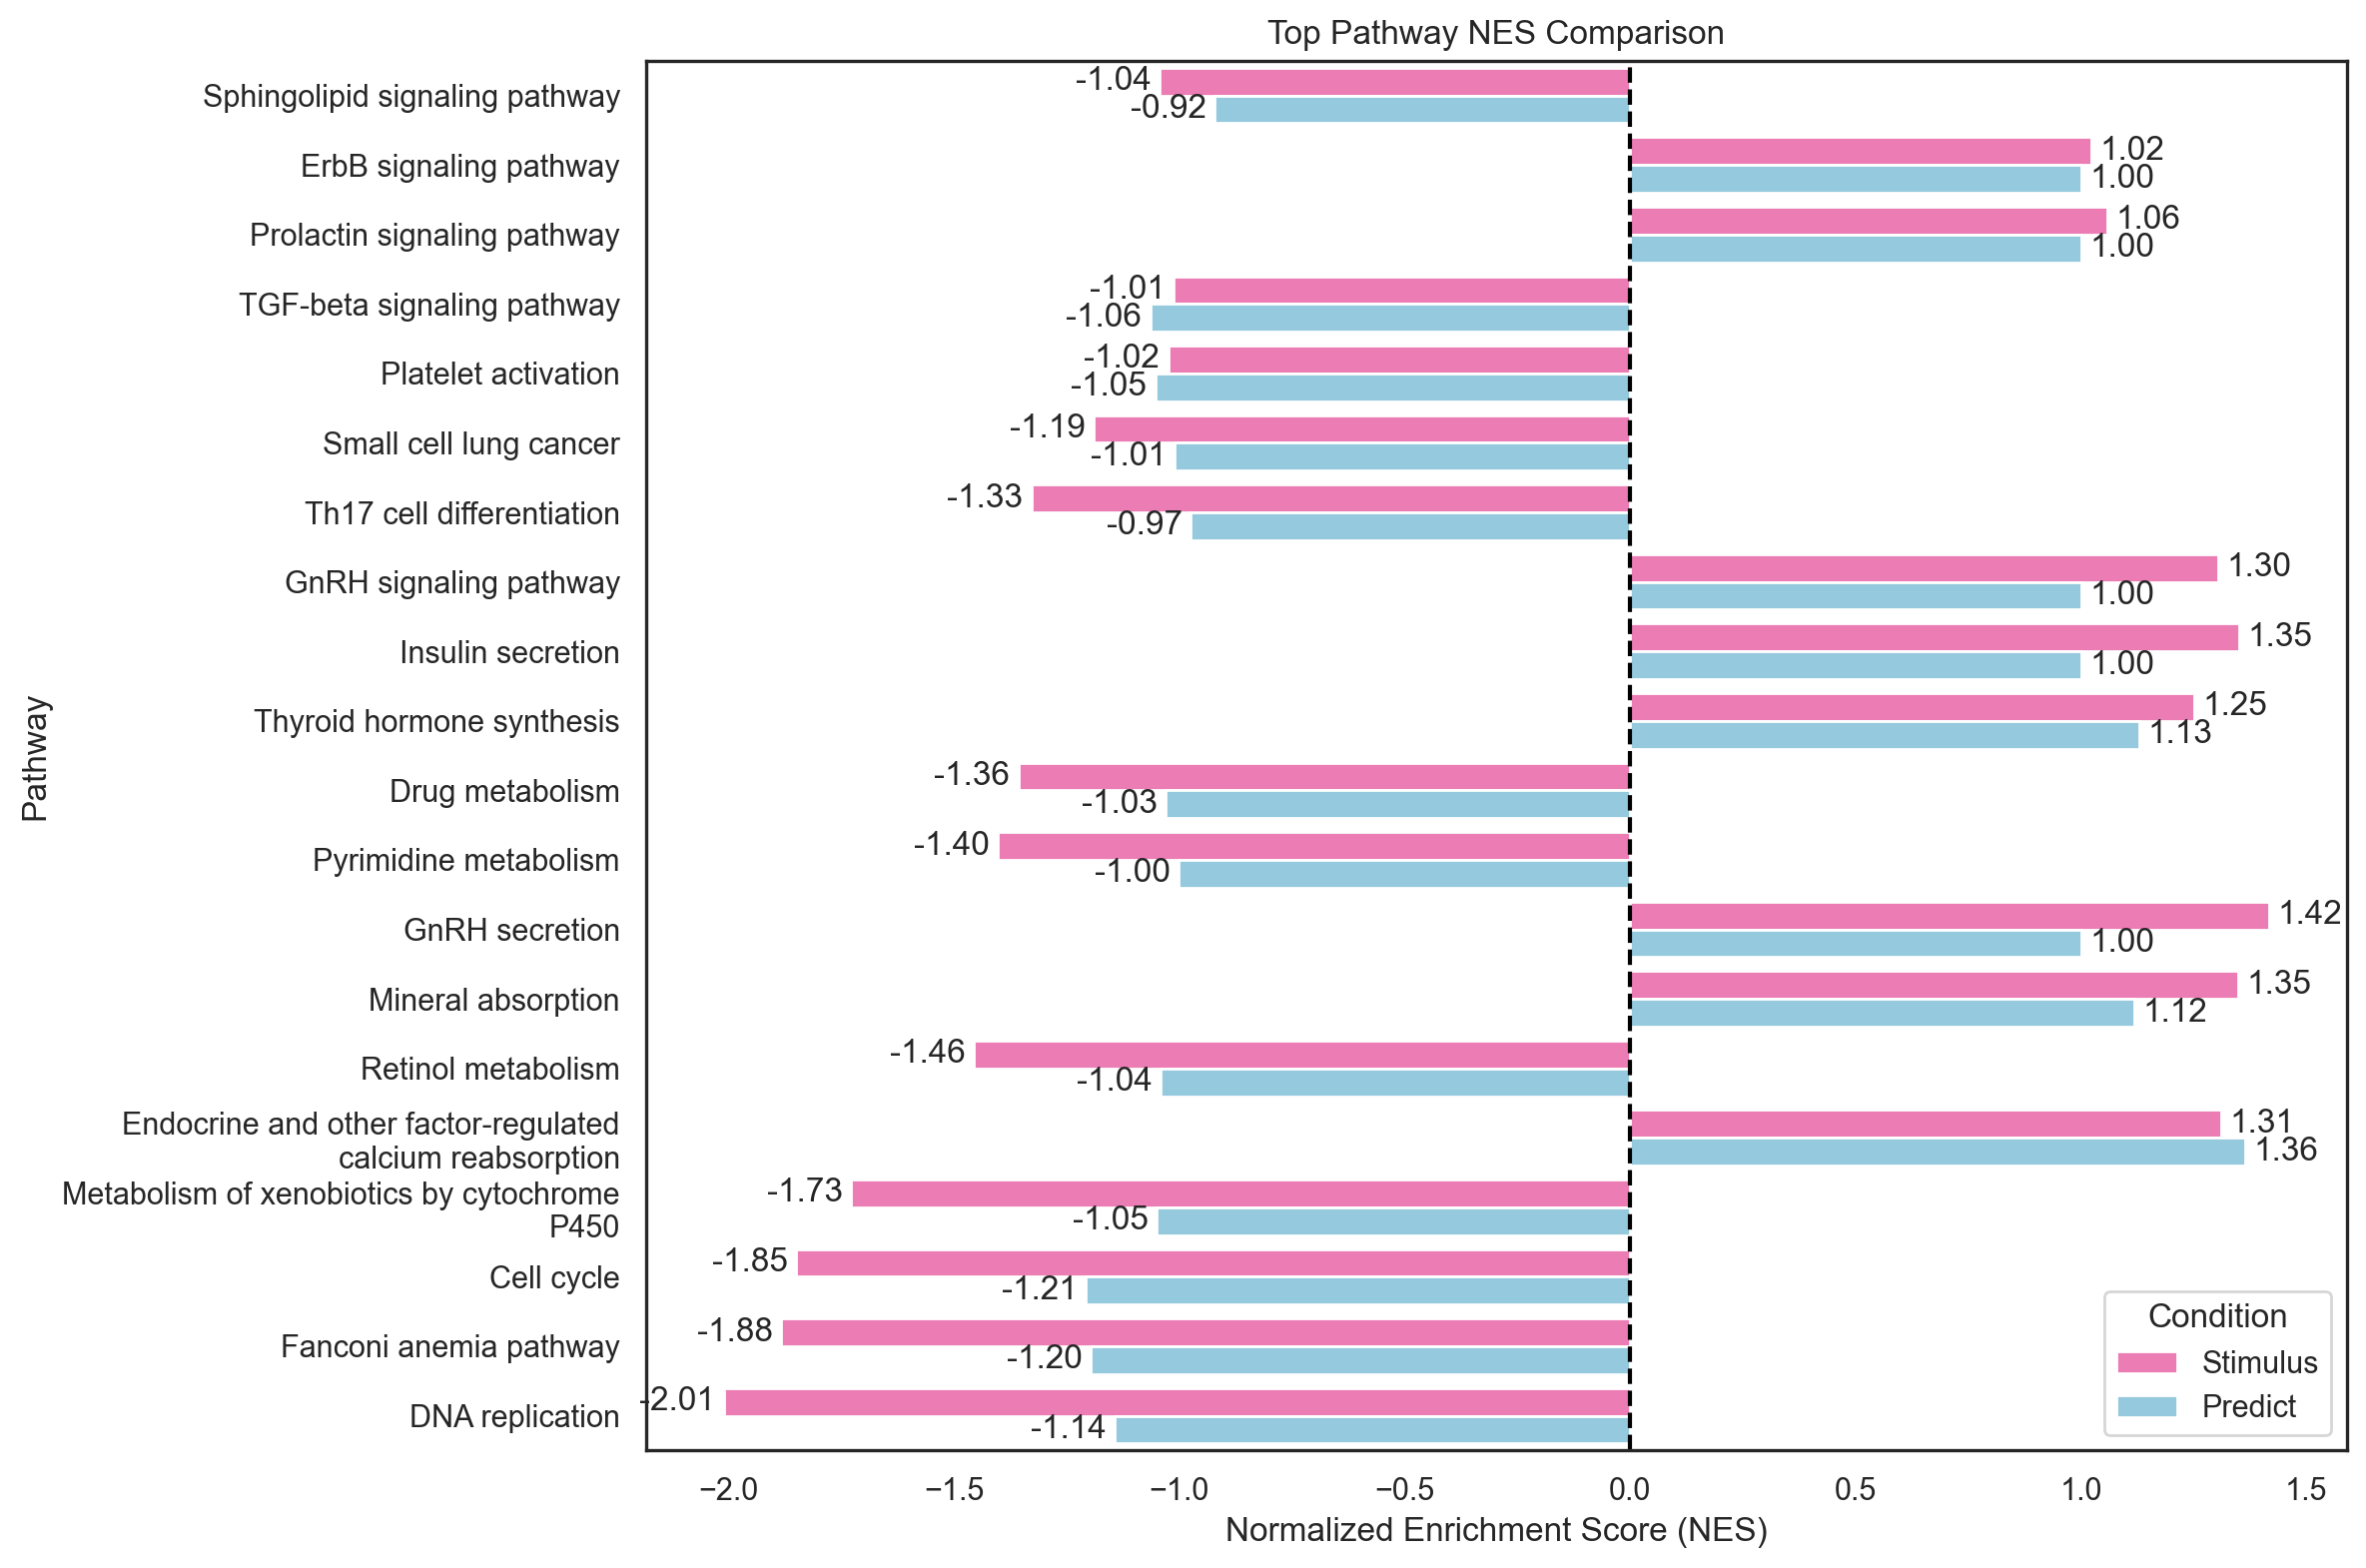

In [ ]:
# 已有的 df_real / df_pred
# df_real = real_gsea.res2d.reset_index().rename(columns={"Term": "Term", "NES": "NES_real"})
# df_pred = pred_gsea.res2d.reset_index().rename(columns={"Term": "Term", "NES": "NES_pred"})

plot_top_common_pathways_from_df(df_real, df_pred, top_n=20)


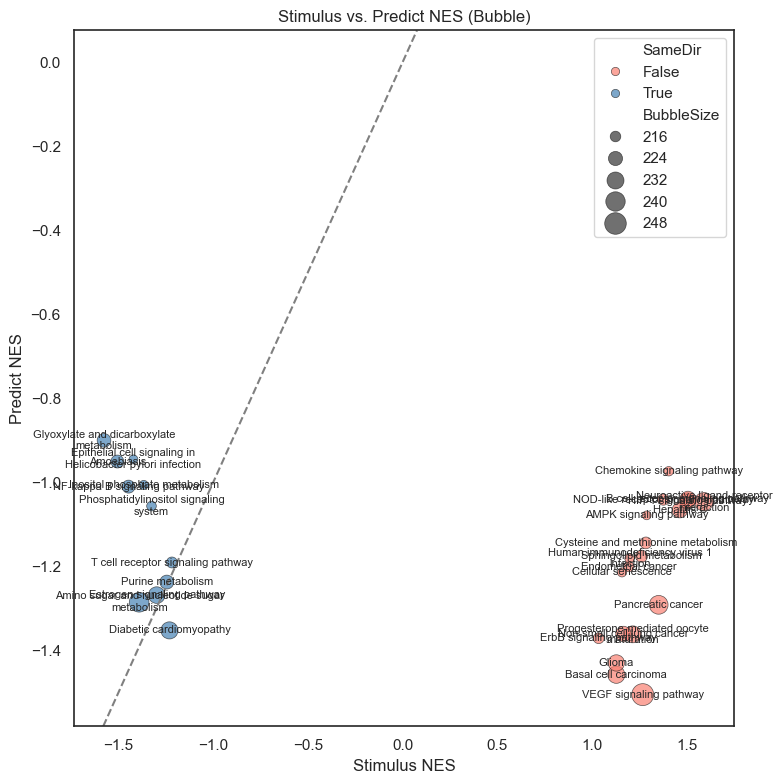

In [ ]:
plot_top_common_pathways_bubble(
    df_real, df_pred,
    score_col_real='NES_real',
    score_col_pred='NES_pred',
    term_col='Pathway',
    top_n=30,              # 看 30 条
    same_direction=False,  # 同时想观察同向与反向
    size_scale=180         # 调整气泡大小
)


In [ ]:
df_pred.to_csv("enrichr_pbmc_CD4T_prd.csv",index=False)

In [ ]:
! pip install matplotlib_venn

Looking in indexes: https://pypi.mirrors.ustc.edu.cn/simple/
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib_venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45437 sha256=01faf3ff8b391731b7f65b7172fe0af366abc55ea2e73482f2b73ec33b48cb7b
  Stored in directory: c:\users\jerry-ai\appdata\local\pip\cache\wheels\28\46\35\1a454ab580b0621f5d67a5a87049c8829b8a017d8c0251bb27
Successfully built matplotlib_venn


In [ ]:
df_real

,index,Name,Pathway,ES,NES_real,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,0,prerank,Neuroactive ligand-receptor interaction,0.767136,1.589027,0.0,0.199891,0.16,12/53,7.65%,EDN1;INSL3;NPW;PARD3;GIPR;PMCH;SSTR3;CHRNA6;AD...
1,1,prerank,Glyoxylate and dicarboxylate metabolism,-0.791764,-1.575713,0.036364,0.990666,0.53,2/15,3.66%,AMT;AFMID
2,2,prerank,B cell receptor signaling pathway,0.799905,1.505261,0.044444,0.632987,0.54,5/30,4.60%,RAC3;CD19;CD22;DAPP1;IFITM1
3,3,prerank,Amoebiasis,-0.820964,-1.505125,0.0,1.0,0.91,11/26,9.95%,LAMA2;CD1D;CSF2;IL1B;CD14;CXCL1;CXCL2;ITGB2;VC...
4,4,prerank,HIF-1 signaling pathway,0.778212,1.501883,0.042553,0.451605,0.6,3/37,3.33%,EDN1;ERBB2;ANGPT1
...,...,...,...,...,...,...,...,...,...,...,...
227,227,prerank,Parkinson disease,-0.151032,-0.319195,1.0,1.0,1.0,16/76,30.04%,TUBA4A;CAMK2G;PINK1;CASP9;KLC2;ITPR2;TUBA1C;PR...
228,228,prerank,Peroxisome,-0.165852,-0.319103,1.0,1.0,1.0,13/36,34.97%,CRAT;PEX1;PEX3;CAT;PECR;ECH1;PEX11B;PEX6;ECI2;...
229,229,prerank,RNA degradation,0.140205,0.270768,1.0,1.0,1.0,1/40,4.37%,PNPT1
230,230,prerank,Mismatch repair,-0.150879,-0.258499,1.0,0.999918,1.0,6/19,38.48%,RPA4;MSH6;MSH3;MSH2;MLH3;POLD3


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# === 加载你的数据 ===
# 请将文件名替换为实际CSV路径
df = df_pred

# === 数据预处理 ===
# 清理百分比格式
# df['Tag %'] = df['Tag %'].astype(str).str.rstrip('%').astype(float)
df['Gene %'] = df['Gene %'].astype(str).str.rstrip('%').astype(float)

# 清洗 FDR q-val 并转为 float
df['FDR q-val'] = df['FDR q-val'].astype(str).str.replace('%', '').str.strip()
df['FDR q-val'] = df['FDR q-val'].replace(['nan', 'NaN', ''], np.nan).astype(float)

# 去除无效数据
df = df.dropna(subset=['Name', 'Pathway', 'FDR q-val'])

# === 构建节点和链接 ===
labels = pd.unique(df[['Name', 'Pathway']].values.ravel())
label_dict = {label: i for i, label in enumerate(labels)}

sources = df['Name'].map(label_dict)
targets = df['Pathway'].map(label_dict)
values = df['Tag %']
bubble_size = df['Gene %']

# === 映射颜色（-log10(FDR q-val) → rgba） ===
fdr_scores = -np.log10(df['FDR q-val'].replace(0, 1e-5).fillna(1e-5))
norm = mcolors.Normalize(vmin=fdr_scores.min(), vmax=fdr_scores.max())
cmap = cm.get_cmap('RdBu_r')

color_vals = ['rgba({},{},{},{})'.format(int(r*255), int(g*255), int(b*255), a)
              for r, g, b, a in cmap(norm(fdr_scores))]

# === 绘制 Sankey 图 ===
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=15,
        line=dict(color="black", width=0.5),
        label=labels.tolist(),
        color="gray"
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=color_vals,
        customdata=bubble_size,
        hovertemplate='Tag %%: %{value}<br>Gene %%: %{customdata}<extra></extra>',
    )
)])

fig.update_layout(title_text="Sankey Bubble Chart (Pathway Enrichment)", font_size=12)
fig.show()


C:\Users\jerry-ai\AppData\Local\Temp\ipykernel_14420\3532374308.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('RdBu_r')
